In [3]:
cd /home/jovyan/workspace/dataset/

/home/jovyan/workspace/dataset


In [4]:
import os

In [5]:
import zipfile
for file in os.listdir():
    print(file)
    if file.endswith(".zip"):
        with zipfile.ZipFile(file, "r") as zip_file:
            zip_file.extractall()
        os.remove(file)
    

FER_Custom_Dataset.zip


In [2]:
!pip install scikit-learn

  Using cached scikit_learn-1.1.3-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (30.8 MB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)


In [ ]:
import os
import torch
import torchvision
import tarfile
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from torch.utils.data import random_split
from torchvision.utils import make_grid
import matplotlib
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
from torch.utils.data.sampler import SubsetRandomSampler
import glob
import torch.optim as optim
import cv2
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torchvision.models import alexnet
import torch.utils.data as td
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from matplotlib import image
from matplotlib import pyplot
import time
import torchvision.datasets as datasets
from tqdm import tqdm
from torch.utils.tensorboard import SummaryWriter
from sklearn.metrics import confusion_matrix, classification_report
%matplotlib inline

In [20]:
data_dir = '/home/jovyan/workspace/dataset/FER_Custom_Dataset'
IMAGE_DIM=256
print(os.listdir(data_dir))

['interested', 'Disappointed', 'neutral']


In [21]:
def load_data(path, test_split, val_split, batch_size, input_size):
    
    ######## Write your code here ########
    
    transform_dict = {
                    'src': transforms.Compose([
                      
                      transforms.Resize(input_size),
                      # transforms.CenterCrop(227), 
                      transforms.RandomHorizontalFlip(), 
                      transforms.ToTensor(),
                      transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                            std=[0.229, 0.224, 0.225]),
     ])}

    data = datasets.ImageFolder(root=path, transform=transform_dict['src'])

    dataset_size = len(data)
    
    train_size = int((1-(test_split+val_split))*dataset_size)+1
    test_size = int(test_split * dataset_size)
    val_size = int(val_split * dataset_size)

    train_dataset, test_dataset, val_dataset= td.random_split(data, [train_size, test_size, val_size])

    data_loader_train = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=False, num_workers=0)
    data_loader_test  = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=True, drop_last=False, num_workers=0)
    data_loader_val  = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=True, drop_last=False, num_workers=0)
    
    return data_loader_train, data_loader_test, data_loader_val

(64, 64, 3)
(64, 64, 3)
(64, 64, 3)


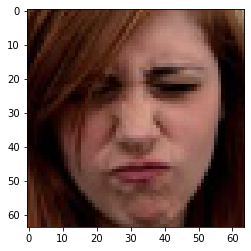

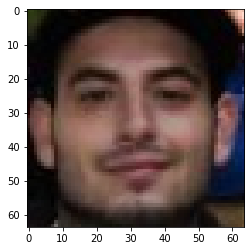

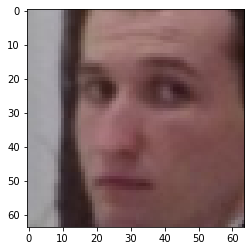

In [22]:
path = "/home/jovyan/workspace/dataset/FER_Custom_Dataset"

######## Write your code here ########
DisappointedImage = image.imread(path+"/Disappointed/2006.jpg")
plt.figure()
plt.imshow(DisappointedImage)
InterestedImage = image.imread(path+"/interested/509.jpg")
plt.figure()
plt.imshow(InterestedImage)
NeutralImage = image.imread(path+"/neutral/24860.jpg")
plt.figure()
plt.imshow(NeutralImage)
print(DisappointedImage.shape)
print(InterestedImage.shape)
print(NeutralImage.shape)

In [23]:
train_loader, test_loader, val_loader = load_data(path, 0.2, 0.1, 32, (224, 224))
print(len(train_loader), len(test_loader), len(val_loader))

91 26 13


In [24]:
def plot_data_loader(data_loader, gridDims):
    
    fig, axes = plt.subplots(nrows=gridDims[0], ncols=gridDims[1], figsize=(5,5))
    dataiter = iter(data_loader)
    for i in range(gridDims[0]):
        for j in range(gridDims[1]):
            images, _ = dataiter.next()
            axes[i, j].imshow(np.transpose(images[0].numpy(), (1, 2, 0)))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


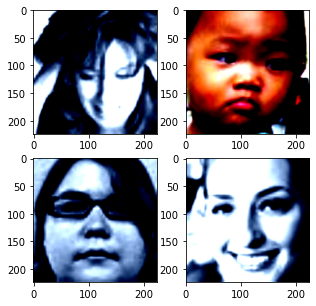

In [25]:
plot_data_loader(train_loader, (2, 2))

In [27]:
model = alexnet(pretrained=False)
n_classes = 3

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Device: {}".format(device))
model.to(device);



Device: cuda:0


In [28]:
model

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [29]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Device: {}".format(device))
model.to(device);

Device: cuda:0


In [30]:
for i, data in enumerate(train_loader):
        images, labels = data[0].to(device), data[1].to(device)
        print(images.shape)
        #print(labels)
        if i == 5:
          break

torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])


In [31]:
def evaluate(model, test_loader):
  model.eval() 
  with torch.no_grad(): 
    correct = 0
    total = 0
    for data in test_loader:
      images, labels = data[0].to(device), data[1].to(device)
      labels=torch.flatten(labels)
      outputs = model(images)
      loss = criterion(outputs, labels)
      _, predicted = torch.max(outputs.data, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()
  accuracy = (correct / total) * 100
  model.train()
  return accuracy, loss.item()

In [32]:
num_epochs = 50
total_steps = len(train_loader)
t1 = time.time()

training_loss = []
training_accuracy = []
validation_loss = []
validation_accuracy = []


for epoch in range(num_epochs):
    for i, data in enumerate(train_loader):
        images, labels = data[0].to(device), data[1].to(device)
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        # Backprop and optimisation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # Train accuracy
        total = labels.size(0)
        _,predicted = torch.max(outputs.data, 1)
        correct = (predicted == labels).sum().item()
        if (i + 1) % 50 == 0:
            val_accu , val_loss = evaluate(model, test_loader)
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}%, val_accuracy: {:.2f}%'
            .format(epoch + 1, num_epochs, i + 1, total_steps, loss.item(),(correct / total) * 100, val_accu))
            training_loss.append(loss.item())
            training_accuracy.append((correct / total) * 100)

            validation_accuracy.append(val_accu)
            validation_loss.append(val_loss)
            
print("######## Training Finished in {} seconds ###########".format(time.time()-t1))


Epoch [1/50], Step [50/91], Loss: 6.6068, Accuracy: 34.38%, val_accuracy: 35.95%
Epoch [2/50], Step [50/91], Loss: 1.1398, Accuracy: 28.12%, val_accuracy: 35.83%
Epoch [3/50], Step [50/91], Loss: 1.1899, Accuracy: 18.75%, val_accuracy: 28.59%
Epoch [4/50], Step [50/91], Loss: 1.2276, Accuracy: 15.62%, val_accuracy: 40.89%
Epoch [5/50], Step [50/91], Loss: 1.0195, Accuracy: 53.12%, val_accuracy: 35.83%
Epoch [6/50], Step [50/91], Loss: 1.0495, Accuracy: 50.00%, val_accuracy: 41.38%
Epoch [7/50], Step [50/91], Loss: 1.1097, Accuracy: 43.75%, val_accuracy: 45.72%
Epoch [8/50], Step [50/91], Loss: 1.0095, Accuracy: 53.12%, val_accuracy: 51.51%
Epoch [9/50], Step [50/91], Loss: 1.0252, Accuracy: 56.25%, val_accuracy: 51.27%
Epoch [10/50], Step [50/91], Loss: 0.9695, Accuracy: 46.88%, val_accuracy: 51.75%
Epoch [11/50], Step [50/91], Loss: 1.0402, Accuracy: 43.75%, val_accuracy: 53.68%
Epoch [12/50], Step [50/91], Loss: 0.9390, Accuracy: 56.25%, val_accuracy: 54.04%
Epoch [13/50], Step [50/9

In [37]:
torch.save(model.state_dict(), "/home/jovyan/workspace/AlexNet_FerCustom.pt")

In [38]:
model.eval() 
with torch.no_grad(): 
  correct = 0
  total = 0
  for data in test_loader:
    images, labels = data[0].to(device), data[1].to(device)
    labels=torch.flatten(labels)
    outputs = model(images)
    loss = criterion(outputs, labels)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
print((correct / total) * 100)

65.50060313630881


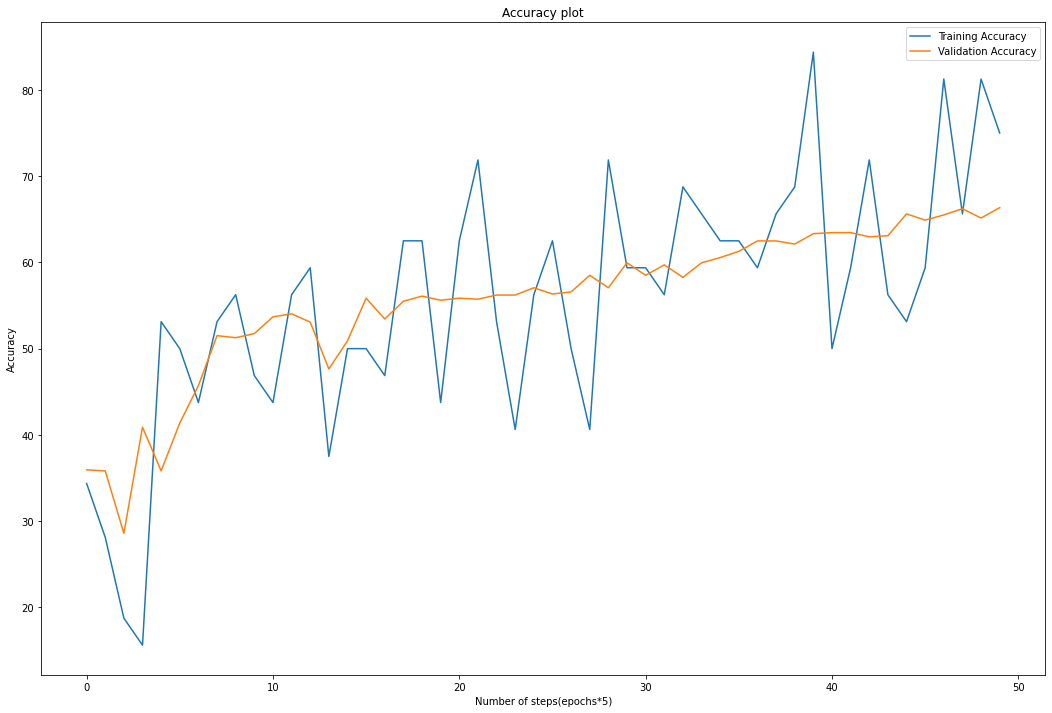

In [40]:
epochs = [i for i in range(num_epochs)]
plt.figure(figsize=(18,12))
plt.xlabel('Number of steps(epochs*5)')
plt.ylabel('Accuracy')
plt.title('Accuracy plot')

plt.plot(epochs,training_accuracy,label='Training Accuracy')
plt.plot(epochs, validation_accuracy, label='Validation Accuracy')    
plt.legend()
plt.savefig('Accuracy_AlexNet_Fer.png')

In [ ]:
epochs = [i for i in range(num_epochs)]
plt.figure(figsize=(18,12))
plt.xlabel('Number of steps(epochs*5)')
plt.ylabel('Accuracy')
plt.title('Accuracy plot')

plt.plot(epochs,training_loss,label='Training Loss')
plt.plot(epochs, validation_loss, label='Validation Loss')    
plt.legend()
plt.savefig('Loss_AlexNet_Fer.png')

In [ ]:
y_pred = []
y_true = []

from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

for inputs, labels in test_loader:
        inputs, labels = data[0].to(device), data[1].to(device)
        output = model(inputs) # Feed Network

        output = (torch.max(torch.exp(output), 1)[1]).data.cpu().numpy()
        y_pred.extend(output) # Save Prediction
        
        labels = labels.data.cpu().numpy()
        y_true.extend(labels) # Save Truth

# constant for classes
classes = ('neutral', 'interested', 'Disappointed')

# Build confusion matrix
cf_matrix = confusion_matrix(y_true, y_pred)
print(cf_matrix)

import seaborn as sns

# sns.heatmap(cf_matrix, annot=True)
df_cm = pd.DataFrame(cf_matrix, index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True)
plt.savefig('Confusion_matrix_AlexNet_Fer.png')
print(classification_report(y_true, y_pred, target_names=['neutral', 'interested', 'Disappointed']))